In [ ]:
# El objetivo de este cuaderno es realizar la primera fase de entendimiento de datos del problema planteado para el reto.
# Limpieza de datos NO REQUERIDA, no se realiza imputación ni eliminación. Los datos se manipulan gráficamente y usando funciones de librerías y sub dataframes para analizarlos.
# Diana Guadalupe García Aguirre - A01276380

In [ ]:
# Importamos librerías:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importamos los datos:
data_train = pd.read_csv('/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/train_motion_data.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/test_motion_data.csv')
data_train2 = pd.read_csv('/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/train_motion_data.csv')

In [ ]:
# Revisamos el set de entrenamiento:
data_train.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [ ]:
data_train.sort_values(["Timestamp"])

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [ ]:
data_train.sort_values(["Timestamp"]).loc[data_train.Class == "NORMAL"]

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
1195,-0.820672,2.556599,-0.617599,-0.031612,-0.865596,-0.962189,NORMAL,3582274
1197,2.488864,-1.001262,0.432143,0.140041,-0.080023,0.051847,NORMAL,3582275
1196,-0.016871,1.171574,0.603792,0.253662,0.692110,0.537485,NORMAL,3582275
1198,-0.680338,-0.048300,-3.298533,-0.169057,-0.383012,0.217392,NORMAL,3582276


In [ ]:
# Revisamos el set de prueba:
data_test.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [ ]:
# Lógicamente, ambos sets describen el mismo fenómeno y cuentan con las mismas características.
# Imprimimos las columnas (o variables) involucradas:
data_train.columns

Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class',
       'Timestamp'],
      dtype='object')

In [ ]:
# Observamos si hay datos faltantes (en el caso del set de entrenamiento):
pd.isna(data_train).sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [ ]:
# Observamos si hay datos faltantes (en el caso del set de prueba):
pd.isna(data_test).sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

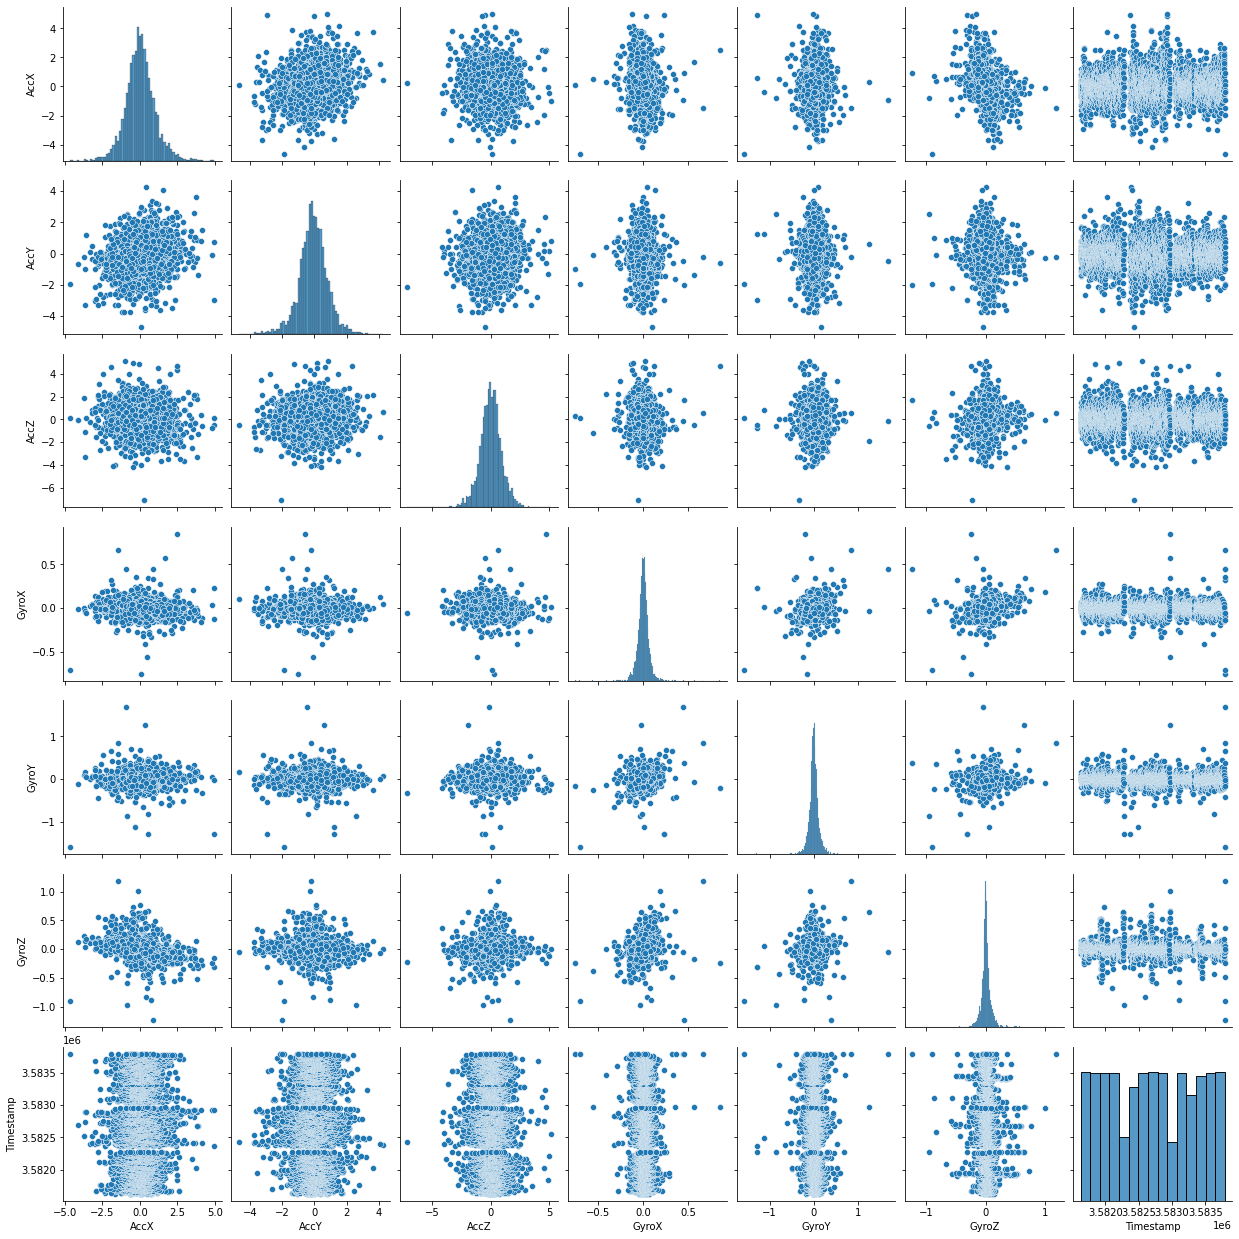

In [ ]:
# No habrán de imputarse los datos en ningún momento del análisis.

# Observamos de manera gráfica un primer vistazo de la distribución de los datos:

# Realizamos ploteos entre pares:
sns.pairplot(data_train, vars=["AccX","AccY","AccZ","GyroX", "GyroY", "GyroZ", "Timestamp"])

In [ ]:
# Se observan diversos comportamientos entre variables, existiendo relaciones de diversos tipos entre ellas.

# Computamos e imprimimos estadísticas basadas en las clases que nos presenta el reto (tipo de conducta de manejo)

# Categorías
print( data_train['Class'].unique() )

# Conteo por categoría
print( data_train['Class'].value_counts() )

# Proporciones de datos existentes por categoría
Nc1      = len(data_train[data_train['Class']=='SLOW'])
Nc2      = len(data_train[data_train['Class']=='NORMAL'])
Nc3      = len(data_train[data_train['Class']=='AGGRESSIVE'])
Ntotal   = Nc1 + Nc2 + Nc3

pct_Nc1  = Nc1 / Ntotal
pct_Nc2  =  Nc2 / Ntotal
pct_Nc3  = Nc3 / Ntotal
print("Proporción de SLOW       es {0:0.1f}%".format(pct_Nc1*100))
print("Proporción de NORMAL     es {0:0.1f}%".format(pct_Nc2*100))
print("Proporción of AGGRESSIVE es {0:0.1f}%".format(pct_Nc3*100))

['NORMAL' 'AGGRESSIVE' 'SLOW']
SLOW          1331
NORMAL        1200
AGGRESSIVE    1113
Name: Class, dtype: int64
Proporción de SLOW       es 36.5%
Proporción de NORMAL     es 32.9%
Proporción of AGGRESSIVE es 30.5%


In [ ]:
# Observamos que los datos no se encuentran balanceados, por lo que habrá que tomar medidas de balanceo.

# Codificamos la etiqueta de cada clase en todas las ocurrencias del conjunto de registros
data_train.Class = [2 if i == 'NORMAL' else 3 if i == 'AGGRESSIVE' else 1 for i in data_train.Class]

# Visualización del conjunto de datos con la clase codificada
data_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,2,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,2,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,2,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,2,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,2,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,1,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,1,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,1,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,1,3583791


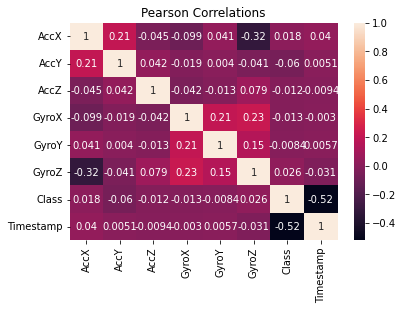

In [ ]:
# Calculamos la correlación entre variables:
ax = sns.heatmap(data_train.corr(), annot=True).set(title='Pearson Correlations');

In [ ]:
# Graficando aceleración en X y giroscopio en Z, clasificados en función de Class

accXSLOW = data_train.loc[data_train.Class == 1]
accXNORMAL = data_train.loc[data_train.Class == 2]
accXAGGRESSIVE = data_train.loc[data_train.Class == 3]

In [ ]:
data_train2

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


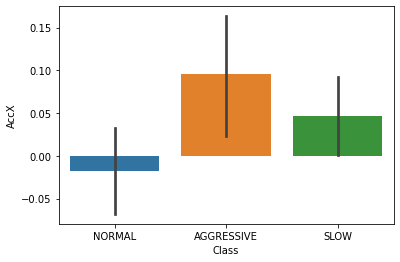

In [ ]:
ax = sns.barplot(x="Class", y="AccX", data=data_train2)

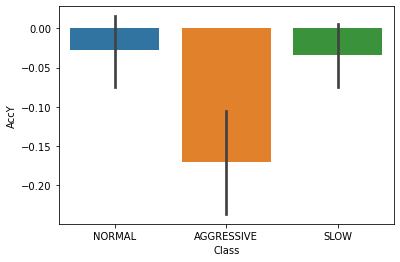

In [ ]:
ax3 = sns.barplot(x="Class", y="AccY", data=data_train2)

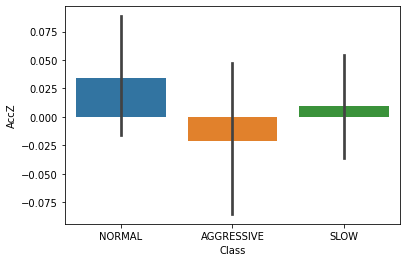

In [ ]:
ax3 = sns.barplot(x="Class", y="AccZ", data=data_train2)

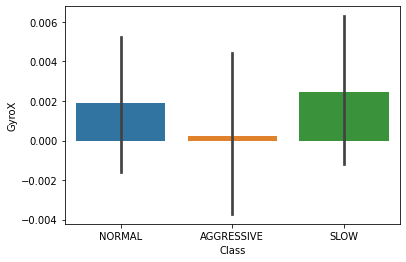

In [ ]:
ax3 = sns.barplot(x="Class", y="GyroX", data=data_train2)

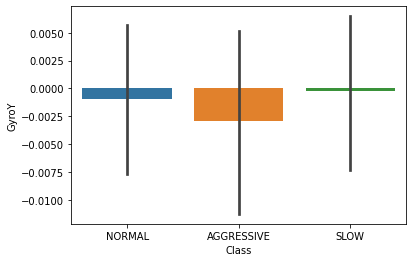

In [ ]:
ax3 = sns.barplot(x="Class", y="GyroY", data=data_train2)

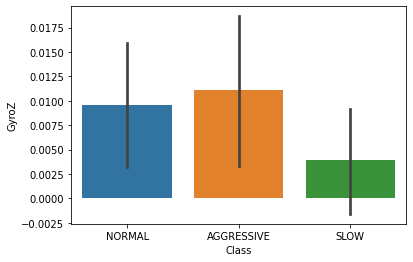

In [ ]:
ax2 = sns.barplot(x="Class", y="GyroZ", data=data_train2)